In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb
import folium
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from IPython.display import display
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/JapanDataV2.csv")  #13k
# df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CentralAmericaV2.csv")  #30k
# df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SouthEastAsia.csv")  #5k
# df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/book.csv")  #30laks
# df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSP EQ 1960-2025.csv")  #10laks
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WorldWide.csv")  #27k
print(df.head())

   Year  Month  Day      Time      Lat       Lon  Depth  Mag  \
0  2024     12   21  15:30:53 -17.7098  168.0292   46.0  6.1   
1  2024     12   17   1:47:26 -17.6859  168.0338   57.1  7.3   
2  2024     12   13  23:38:18 -35.3392  -70.7315  109.0  6.4   
3  2024     12    9   0:38:52  50.8286 -177.4336   10.0  6.1   
4  2024     12    9   0:15:30  50.9881 -177.1825   19.0  6.3   

                            Region   Timestamp  
0                  VANUATU ISLANDS  1734795053  
1                  VANUATU ISLANDS  1734400046  
2    CHILE-ARGENTINA BORDER REGION  1734133098  
3  ANDREANOF ISLANDS, ALEUTIAN IS.  1733704732  
4  ANDREANOF ISLANDS, ALEUTIAN IS.  1733703330  


In [ ]:
df['Time_in_seconds'] = df['Time'].apply(
    lambda x: int(x.split(':')[0]) * 3600 + int(x.split(':')[1]) * 60 + int(x.split(':')[2])
)
X = df[['Lat', 'Lon', 'Depth', 'Year', 'Month', 'Day', 'Time_in_seconds']].values
y = df['Mag'].values
print("Missing values:", df.isnull().sum())

Missing values: Year               0
Month              0
Day                0
Time               0
Lat                0
Lon                0
Depth              0
Mag                0
Region             0
Timestamp          0
Time_in_seconds    0
dtype: int64


In [ ]:
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_norm = (X - X_min) / (X_max - X_min)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 25576 samples
Test set size: 6394 samples


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


In [ ]:
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = 100 - (np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print("Random Forest Regressor Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

Random Forest Regressor Performance:
R² Score: 0.7852
Mean Absolute Error (MAE): 0.2696
Accuracy: 93.54%


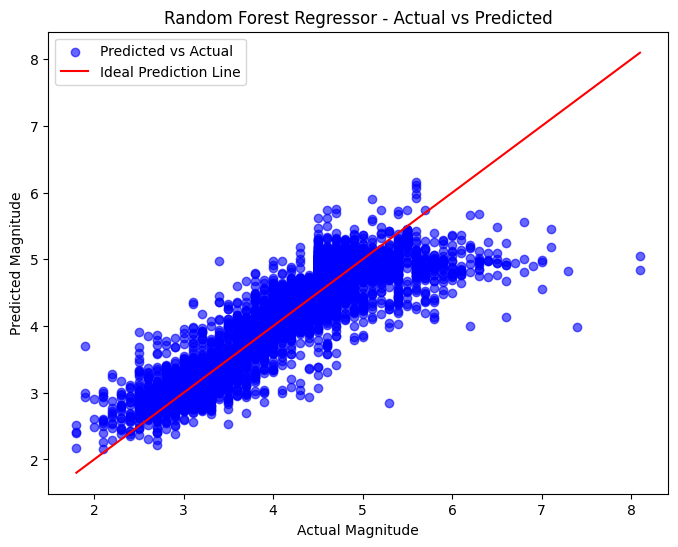

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Random Forest Regressor - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
accuracy_svm = 100 - (np.mean(np.abs((y_test - y_pred_svm) / y_test)) * 100)
print(f"SVR Performance:")
print(f"R² Score: {r2_svm:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svm:.4f}")
print(f"Accuracy: {accuracy_svm:.2f}%")

SVR Performance:
R² Score: 0.6866
Mean Absolute Error (MAE): 0.3278
Accuracy: 91.98%


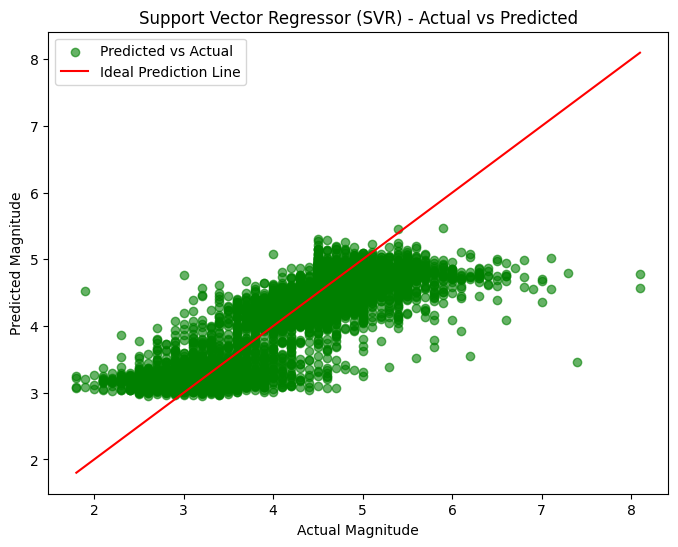

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, alpha=0.6, color='g', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Support Vector Regressor (SVR) - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
accuracy_dt = 100 - (np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100)
print(f"Decision Tree Regressor Performance:")
print(f"R² Score: {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Accuracy: {accuracy_dt:.2f}%")

Decision Tree Regressor Performance:
R² Score: 0.5761
Mean Absolute Error (MAE): 0.3597
Accuracy: 91.31%


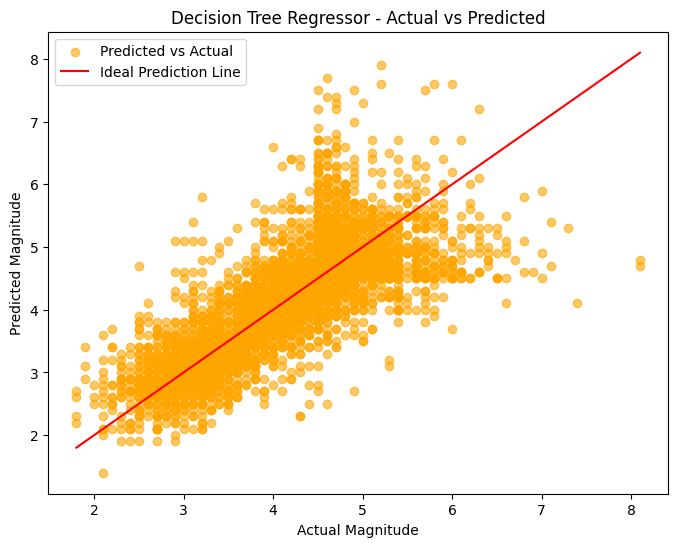

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='orange', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Decision Tree Regressor - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


In [ ]:
y_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
accuracy_knn = 100 - (np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100)
print("K-Nearest Neighbors Regressor Performance:")
print(f"R² Score: {r2_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Accuracy: {accuracy_knn:.2f}%")


K-Nearest Neighbors Regressor Performance:
R² Score: 0.6638
Mean Absolute Error (MAE): 0.3475
Accuracy: 91.57%


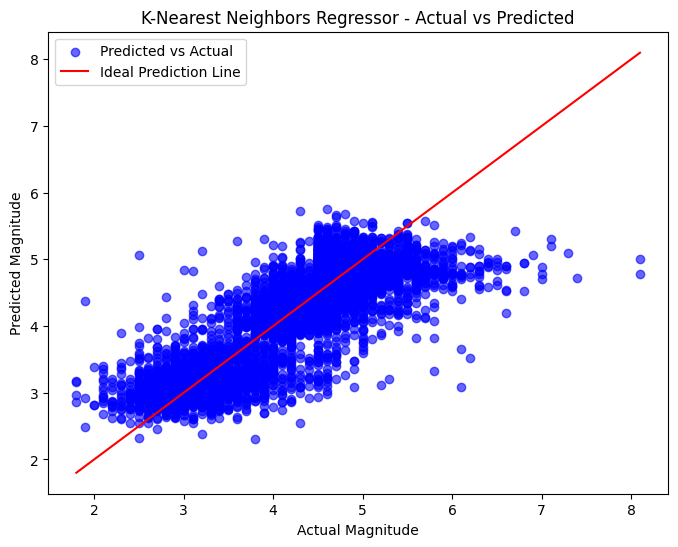

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("K-Nearest Neighbors Regressor - Actual vs Predicted")
plt.legend()
plt.show()


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
accuracy_xgb = 100 - (np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100)
print(f"XGBoost Performance:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Accuracy: {accuracy_xgb:.2f}%")

XGBoost Performance:
R² Score: 0.7773
Mean Absolute Error (MAE): 0.2740
Accuracy: 93.47%


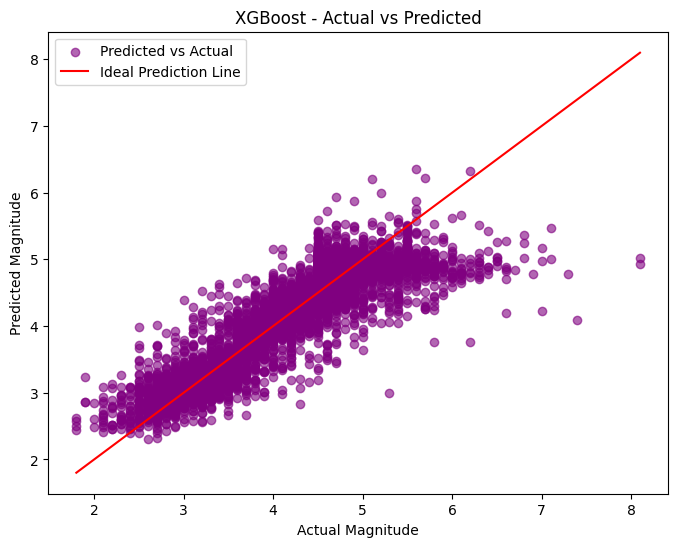

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='purple', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("XGBoost - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
accuracy_lgb = 100 - (np.mean(np.abs((y_test - y_pred_lgb) / y_test)) * 100)
print(f"LightGBM Performance:")
print(f"R² Score: {r2_lgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lgb:.4f}")
print(f"Accuracy: {accuracy_lgb:.2f}%")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 25576, number of used features: 7
[LightGBM] [Info] Start training from score 4.239940
LightGBM Performance:
R² Score: 0.7802
Mean Absolute Error (MAE): 0.2735
Accuracy: 93.49%
Model saved as lgb_model.pkl


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

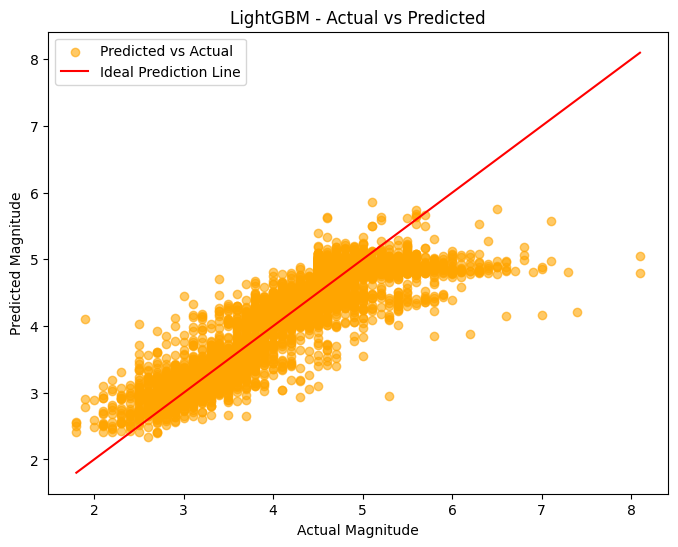

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.6, color='orange', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("LightGBM - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
accuracy_mlp = 100 - (np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100)
print(f"MLP Performance:")
print(f"R² Score: {r2_mlp:.4f}")
print(f"Mean Absolute Error (MAE): {mae_mlp:.4f}")
print(f"Accuracy: {accuracy_mlp:.2f}%")

MLP Performance:
R² Score: 0.7313
Mean Absolute Error (MAE): 0.3009
Accuracy: 92.84%


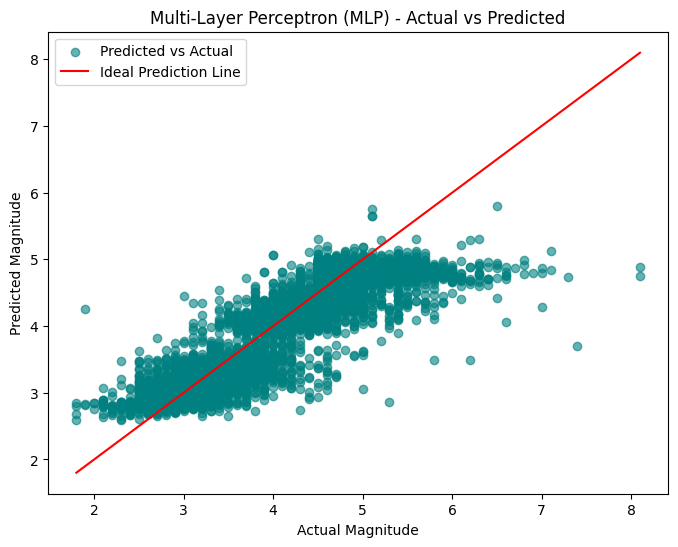

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.6, color='teal', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Multi-Layer Perceptron (MLP) - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_absolute_error')
rnn_model.fit(X_train_rnn, y_train, epochs=40, batch_size=42, verbose=1)
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)
accuracy_rnn = 100 - (np.mean(np.abs((y_test - y_pred_rnn) / y_test)) * 100)
print(f"RNN Performance:")
print(f"R² Score: {r2_rnn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn:.4f}")
print(f"Accuracy: {accuracy_rnn:.2f}%")

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


609/609 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6144
Epoch 2/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4994
Epoch 3/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4243
Epoch 4/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4204
Epoch 5/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4211
Epoch 6/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4158
Epoch 7/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4159
Epoch 8/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4115
Epoch 9/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4120
Epoch 10/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4106
Epoch 11/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4098
Epoch 12/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4062
Epoch 13/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4017
Epoch 14/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3978
Epoch 15/40
609/609 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3930


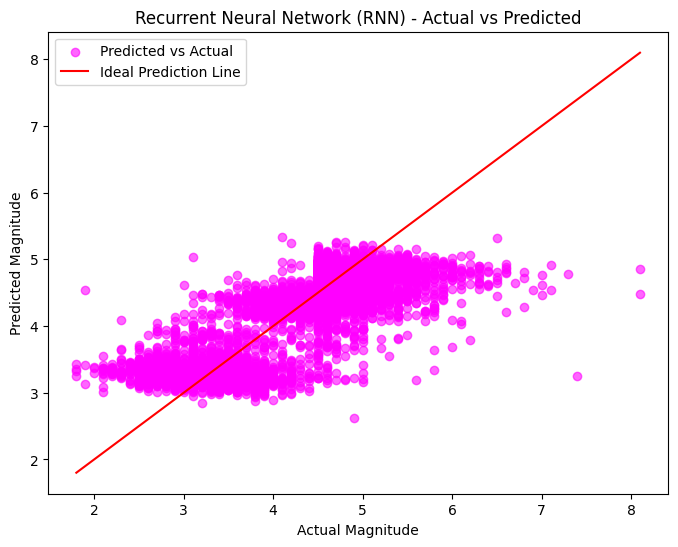

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.6, color='magenta', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Recurrent Neural Network (RNN) - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
accuracy_lstm = 100 - (np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100)
print(f"LSTM Performance:")
print(f"R² Score: {r2_lstm:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"Accuracy: {accuracy_lstm:.2f}%")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.9699
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4934
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4287
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4216
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4188
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4151
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4102
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4044
Epoch 9/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4025
Epoch 10/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4032
Epoch 11/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3985
Epoch 12/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4002
Epoch 13/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3985
Epoch 14/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3968
Epoch 15/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3987


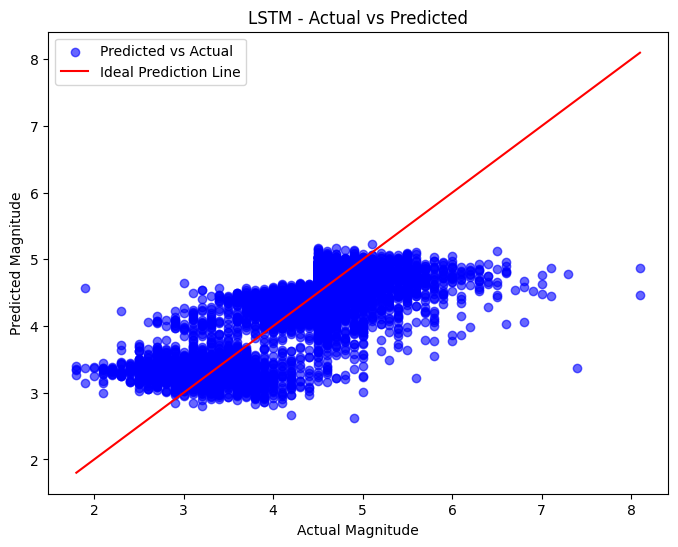

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("LSTM - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_absolute_error')
gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, verbose=1)
y_pred_gru = gru_model.predict(X_test_gru).flatten()
mae_gru = mean_absolute_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)
accuracy_gru = 100 - (np.mean(np.abs((y_test - y_pred_gru) / y_test)) * 100)
print(f"GRU Performance:")
print(f"R² Score: {r2_gru:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gru:.4f}")
print(f"Accuracy: {accuracy_gru:.2f}%")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.6428
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4294
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4188
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.4185
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.4169
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.4138
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.4069
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4000
Epoch 9/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3964
Epoch 10/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3904
Epoch 11/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3872
Epoch 12/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3820
Epoch 13/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3790
Epoch 14/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3779
Epoch 15/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.37

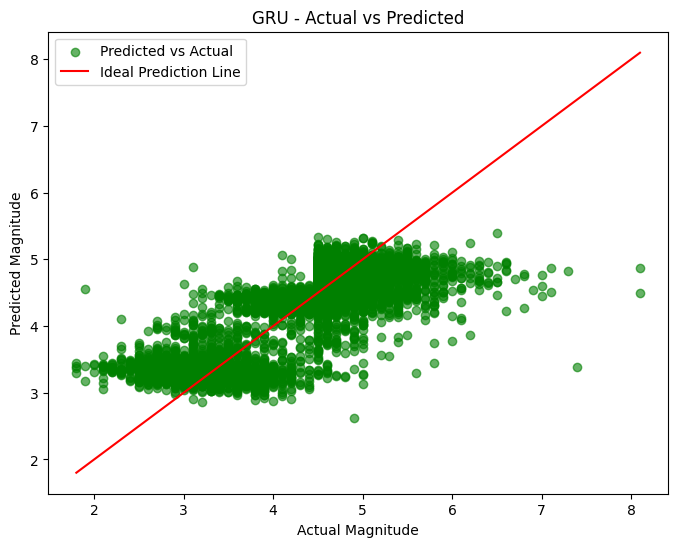

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gru, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction Line')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("GRU - Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
seq_length = 10
train_generator = TimeseriesGenerator(X_train, y_train, length=seq_length, batch_size=32)
test_generator = TimeseriesGenerator(X_test, y_test, length=seq_length, batch_size=32)
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)
    y = Dense(ff_dim, activation="relu")(x)
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    y = LayerNormalization(epsilon=1e-6)(x + y)
    return y
inputs = Input(shape=(seq_length, X_train.shape[1]))
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(1)(x)
transformer_model = Model(inputs, outputs)
transformer_model.compile(optimizer='adam', loss='mean_absolute_error')
transformer_model.fit(train_generator, epochs=40, batch_size=42, verbose=1, validation_data=test_generator)
y_pred_transformer = transformer_model.predict(test_generator).flatten()
mae_transformer = mean_absolute_error(y_test[seq_length:], y_pred_transformer)
r2_transformer = r2_score(y_test[seq_length:], y_pred_transformer)
accuracy_transformer = 100 - (np.mean(np.abs((y_test[seq_length:] - y_pred_transformer) / y_test[seq_length:])) * 100)
print(f"Transformer Performance:")
print(f"R² Score: {r2_transformer:.4f}")
print(f"Mean Absolute Error (MAE): {mae_transformer:.4f}")
print(f"Accuracy: {accuracy_transformer:.2f}%")

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


799/799 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 1.0437 - val_loss: 0.6641
Epoch 2/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6452 - val_loss: 0.6395
Epoch 3/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6463 - val_loss: 0.6493
Epoch 4/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6447 - val_loss: 0.6395
Epoch 5/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6448 - val_loss: 0.6414
Epoch 6/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6445 - val_loss: 0.6386
Epoch 7/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6461 - val_loss: 0.6402
Epoch 8/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6449 - val_loss: 0.6384
Epoch 9/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6436 - val_loss: 0.6478
Epoch 10/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.6419 - val_loss: 0.6386
Epoch 11/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6418 - val_loss: 0.6381
Epoch 12/40
799/799 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 

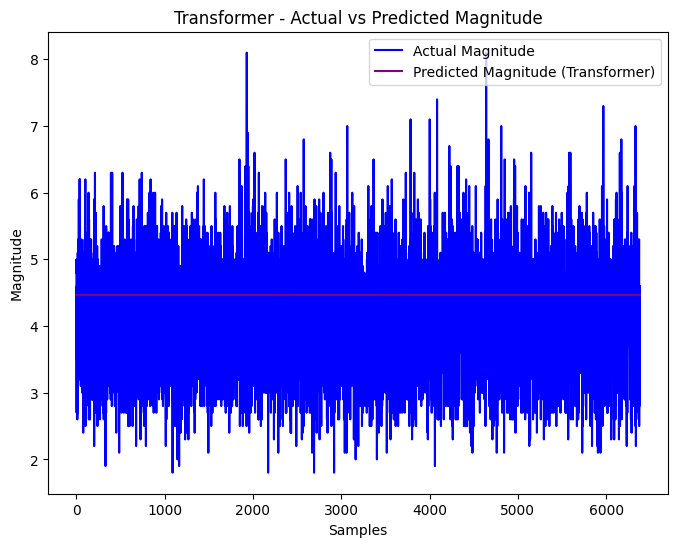

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_test[seq_length:], label="Actual Magnitude", color="blue")
plt.plot(y_pred_transformer, label="Predicted Magnitude (Transformer)", color="purple")
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.title("Transformer - Actual vs Predicted Magnitude")
plt.legend()
plt.show()

In [ ]:
print("All results")
print(f"Random Forest Regressor Accuracy: {accuracy:.2f}%")
print(f"Support Vector Machine Accuracy: {accuracy_svm:.2f}%")
print(f"Decision Trees Regressor Accuracy: {accuracy_dt:.2f}%")
print(f"K-Nearest Neighbour Accuracy: {accuracy_knn:.2f}%")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}%")
print(f"Light GBM Accuracy: {accuracy_lgb:.2f}%")
print(f"Multi-Layer Perceptron (MLP) Accuracy: {accuracy_mlp:.2f}%")
print(f"Recurrent Neural Networks Accuracy: {accuracy_rnn:.2f}%")
print(f"LSTM Accuracy: {accuracy_lstm:.2f}%")
print(f"Gated Recurrent Unit  Accuracy: {accuracy_gru:.2f}%")
print(f"Transformer Accuracy: {accuracy_transformer:.2f}%")

All results
Random Forest Regressor Accuracy: 93.54%
Support Vector Machine Accuracy: 91.98%
Decision Trees Regressor Accuracy: 91.31%
K-Nearest Neighbour Accuracy: 91.57%
XGBoost Accuracy: 93.47%
Light GBM Accuracy: 93.49%
Multi-Layer Perceptron (MLP) Accuracy: 92.84%
Recurrent Neural Networks Accuracy: 90.85%
LSTM Accuracy: 90.54%
Gated Recurrent Unit  Accuracy: 90.63%
Transformer Accuracy: 82.19%


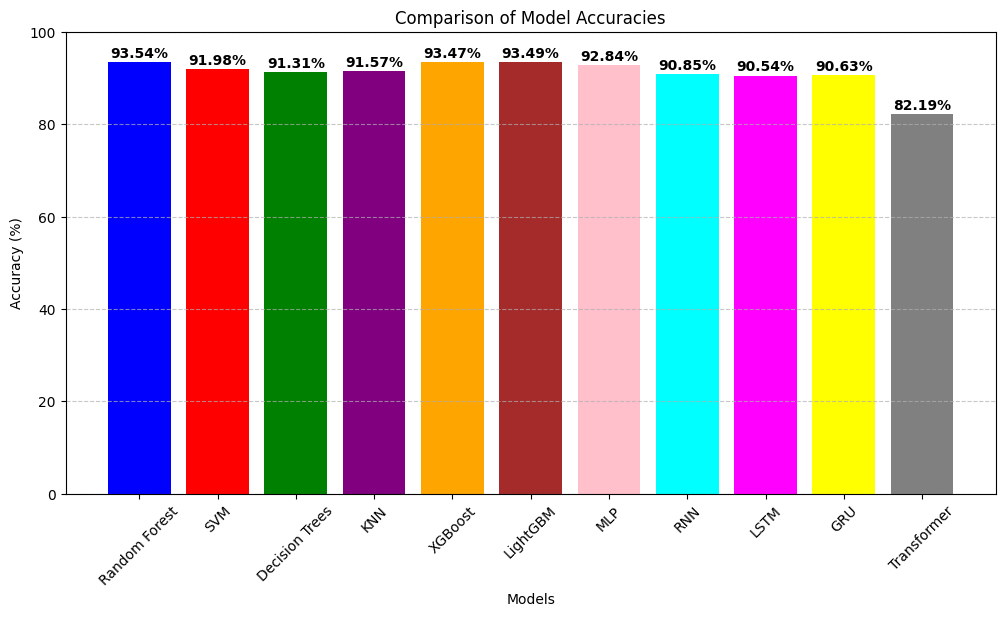

In [ ]:
import matplotlib.pyplot as plt

models = [
    "Random Forest", "SVM", "Decision Trees", "KNN", "XGBoost",
    "LightGBM", "MLP", "RNN", "LSTM", "GRU", "Transformer"
]

accuracies = [
    accuracy, accuracy_svm, accuracy_dt, accuracy_knn, accuracy_xgb,
    accuracy_lgb, accuracy_mlp, accuracy_rnn, accuracy_lstm, accuracy_gru, accuracy_transformer
]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'gray'])

plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.show()


In [ ]:
model_accuracies = {
    "Random Forest": accuracy,
    "XGBoost": accuracy_xgb,
    "LightGBM": accuracy_lgb,
    "Decision Trees": accuracy_dt,
    "KNN": accuracy_knn,
    "SVM": accuracy_svm,
    "MLP": accuracy_mlp,
    "RNN": accuracy_rnn,
    "LSTM": accuracy_lstm,
    "GRU": accuracy_gru,
    "Transformer": accuracy_transformer
}

sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

top_3_models = sorted_models[:3]

print("Top 3 Models:")
for model, acc in top_3_models:
    print(f"{model}: {acc:.2f}%")


Top 3 Models:
Random Forest: 93.54%
LightGBM: 93.49%
XGBoost: 93.47%


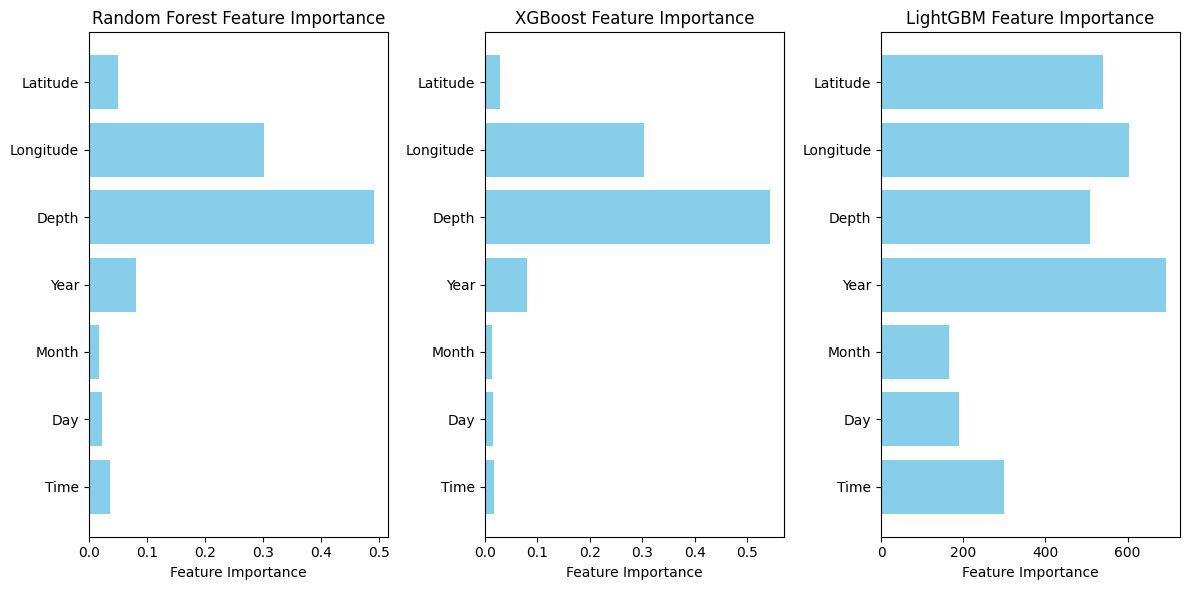

In [ ]:
feature_names = ['Latitude', 'Longitude', 'Depth', 'Year', 'Month', 'Day', 'Time']

feature_importance_dict = {}

if "Random Forest" in [m[0] for m in top_3_models]:
    feature_importance_dict["Random Forest"] = rf_model.feature_importances_

if "XGBoost" in [m[0] for m in top_3_models]:
    feature_importance_dict["XGBoost"] = xgb_model.feature_importances_

if "SVM" in [m[0] for m in top_3_models]:
  result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42, scoring="neg_mean_absolute_error")
  feature_importance_dict["SVM"] = result.importances_mean

if "LightGBM" in [m[0] for m in top_3_models]:
    feature_importance_dict["LightGBM"] = lgb_model.feature_importances_

if "Decision Tree" in [m[0] for m in topa]:
    feature_importance_dict["Decision Tree"] = dt.feature_importances_

if "MLP" in [m[0] for m in top_3_models]:
    result = permutation_importance(mlp_model, X_test, y_test, n_repeats=10, random_state=42, scoring='r2')
    feature_importance_dict["Multi-Layer Perceptron"] = result.importances_mean
plt.figure(figsize=(12, 6))
for i, (model_name, importance) in enumerate(feature_importance_dict.items()):
    plt.subplot(1,3, i+1)
    plt.barh(feature_names, importance, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title(f"{model_name} Feature Importance")
    plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
lat = float(input("Enter Latitude (.....): "))
lon = float(input("Enter Longitude (.....): "))
depth = float(input("Enter Depth (10-900km): "))
year = int(input("Enter Year (e.g., 2023): "))
month = int(input("Enter Month (1-12): "))
day = int(input("Enter Day (1-31): "))
time = input("Enter Time (HH:MM:SS): ")
time_in_seconds = int(time.split(':')[0]) * 3600 + int(time.split(':')[1]) * 60 + int(time.split(':')[2])
InputX = np.array([[lat, lon, depth, year, month, day, time_in_seconds]])
InputX_norm = (InputX - X_min) / (X_max - X_min)
predicted_magnitude = lgb_model.predict(InputX_norm)
print(f"Predicted Magnitude: {predicted_magnitude[0]:.2f}")